In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data from the CSV into a DataFrame
# Assume a 'dog_rates_tweets.csv' file is in the same folder as the notebook
data = pd.read_csv("./dog_rates_tweets.csv")

In [3]:
# Find tweets that contain an 'n/10' rating (because not all do)
def get_rating(tweet):
    m = re.findall('(\d+(\.\d+)?)/10', tweet)
    if m :
        return float(m[0][0])
    else :
        return "None"
    
# Extract the numeric rating
data['rating'] = data['text'].apply(get_rating)

# Exclude tweets that don't contain a rating
data.drop(data[data.rating == "None"].index, inplace=True)

In [4]:
# Remove outliers: there are a few obvious ones
# Exclude rating values that are too large to make sense (Maybe larger than 25/10?)
data.drop(data[data.rating > 25].index, inplace=True)

In [9]:
# Make sure the 'created_at' column is a datetime value, not a string
# You can either do this by applying a function that parses the string to a date
# OR by asking Pandas' read_csv function to parse dates in that column with a parse_dates argument
data['created_at'] = pd.to_datetime(data['created_at'])

pvalue:  7.79578475263e-77


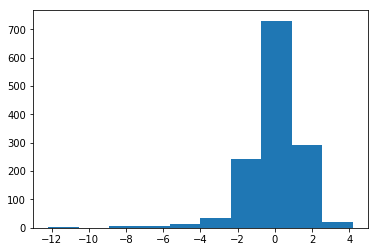

In [43]:
# scipy.stats.linregress function can do a linear regression for us
# But it works on numbers, not datetime objects
# So create a timestamp column
def to_timestamp(datetime):
    timestamp = datetime.timestamp()
    return timestamp
data['timestamp'] = data['created_at'].apply(to_timestamp)

# Now use linregress to get a slope and intercept for a best fit line
data['rating'] = data['rating'].astype(float)
slope, intercept, rvalue, pvalue, _ = stats.linregress(data['timestamp'], data['rating'])

print('pvalue: ', pvalue)

# Residuals are the observed values minus predicted values
data['predicted'] = data.apply(lambda x: slope*x['timestamp'] + intercept, axis=1)
data['residuals'] = data['rating'] - data['predicted']

# Plot a Histogram of the residuals
plt.hist(data['residuals'])
plt.show()